<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

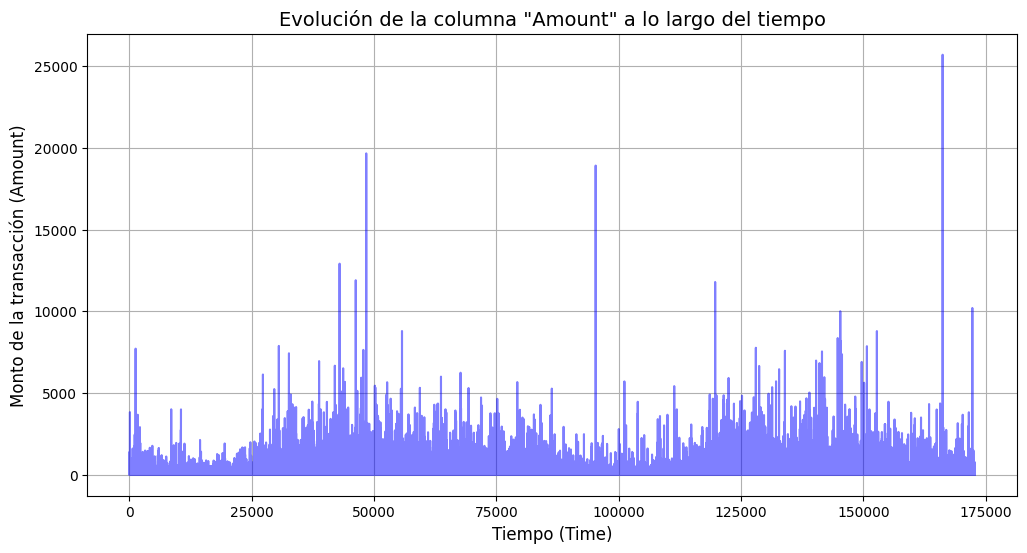

<ipython-input-13-52f52ff5fc5a>:25: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Class'], sort = True)


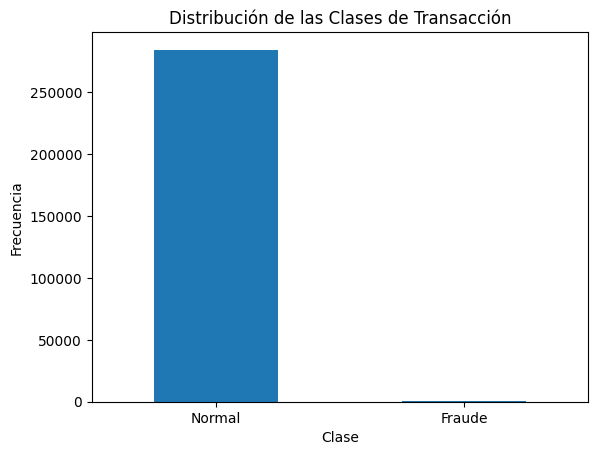

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
LABELS = ["Normal", "Fraude"]

# Cargar el dataset
df = pd.read_csv('/content/drive/MyDrive/Maestria/monografia/creditcard.csv')

# Ver las primeras filas del dataset
df.head()

df.info()

df.isnull().sum()

plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['Amount'], color='blue', alpha=0.5)  # alpha para hacer la línea más suave
plt.title('Evolución de la columna "Amount" a lo largo del tiempo', fontsize=14)
plt.xlabel('Tiempo (Time)', fontsize=12)
plt.ylabel('Monto de la transacción (Amount)', fontsize=12)
plt.grid(True)
plt.show()


count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Distribución de las Clases de Transacción")
plt.xticks(range(2), LABELS)
plt.xlabel("Clase")
plt.ylabel("Frecuencia");



In [6]:
# Balance de clases, para verificar la dispersion de las clases en cuestion
print(df['Class'].value_counts())


Class
0    284315
1       492
Name: count, dtype: int64


In [9]:
# Normalizacion
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.drop(columns=['Class']))
data_scaled

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

In [25]:
Normal = df[df['Class']==0]
Fraude = df[df['Class']==1]
Normal.shape
Fraude.shape
Normal.Amount.describe()


,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [26]:
Fraude.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


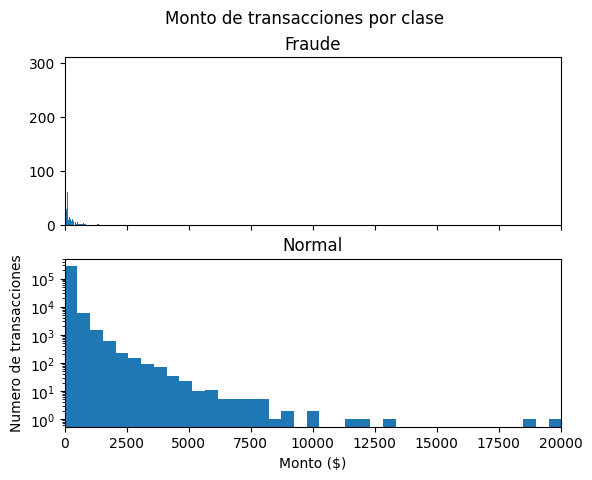

In [28]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Monto de transacciones por clase')
bins = 50
ax1.hist(Fraude.Amount, bins = bins)
ax1.set_title('Fraude')
ax2.hist(Normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Monto ($)')
plt.ylabel('Numero de transacciones')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

In [30]:
outlier_fraction = len(Fraude)/float(len(Normal))
print(outlier_fraction)
print("Fraud Cases : {}".format(len(Fraude)))
print("Valid Cases : {}".format(len(Normal)))


0.0017304750013189597
Fraud Cases : 492
Valid Cases : 284315


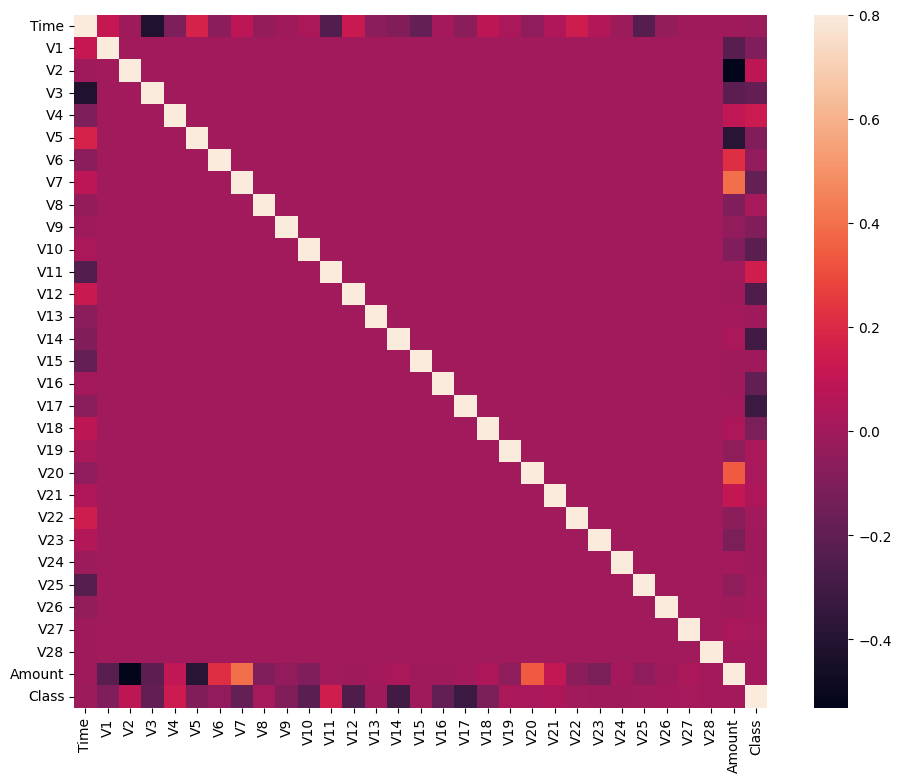

In [31]:
#Matriz de correlación
correlation_matrix = df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor # Import LocalOutlierFactor

import numpy as np # Importing numpy and aliasing as 'np'
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor # Import LocalOutlierFactor
from sklearn.metrics import classification_report # This import was missing



columns = df.columns.tolist()
#Filtramos las columnas para borrar los datos que no queremos
columns = [c for c in columns if c not in ["Class"]]
#Guardamos la variable que estamos prediciendo
target = "Class"
#Definimos un estado aleatorio
state = np.random.RandomState(42)
X = df[columns]
Y = df[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Imprimimos las formas de X y Y
print(X.shape)
print(Y.shape)
classifiers={
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X),
                                       contamination=outlier_fraction, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
}
n_outliers = len(Fraude)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Isolation Forest":
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    #print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

(284807, 30)
(284807,)
Isolation Forest: 661
Accuracy Score :
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.33      0.33      0.33       492

    accuracy                           1.00    284807
   macro avg       0.66      0.66      0.66    284807
weighted avg       1.00      1.00      1.00    284807

